In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("pitch_movement_CH.csv")

print(df.shape)
print(df.keys())
df.head()

(291, 24)
Index(['year', 'last_name', ' first_name', 'pitcher_id', 'team_name',
       'team_name_abbrev', 'pitch_hand', 'avg_speed', 'pitches_thrown',
       'total_pitches', 'pitches_per_game', 'pitch_per', 'pitch_type',
       'pitch_type_name', 'pitcher_break_z', 'league_break_z', 'diff_z',
       'rise', 'pitcher_break_x', 'league_break_x', 'diff_x', 'tail',
       'percent_rank_diff_z', 'percent_rank_diff_x'],
      dtype='object')


,year,last_name,first_name,pitcher_id,team_name,team_name_abbrev,pitch_hand,avg_speed,pitches_thrown,total_pitches,...,pitcher_break_z,league_break_z,diff_z,rise,pitcher_break_x,league_break_x,diff_x,tail,percent_rank_diff_z,percent_rank_diff_x
0,2022,López,Pablo,641154,Marlins,MIA,R,87.5,1026,2910,...,32.4,-30.5,1.8,6,17.3,-14.5,2.8,19,0.720690,0.910345
1,2022,Webb,Logan,657277,Giants,SF,R,86.4,937,3006,...,42.0,-35.7,6.3,18,7.1,-13.6,-6.5,-48,0.979310,0.006897
2,2022,Alcantara,Sandy,645261,Marlins,MIA,R,91.8,896,3248,...,28.8,-27.5,1.3,5,16.8,-15.4,1.4,9,0.665517,0.686207
3,2022,Gonzales,Marco,594835,Mariners,SEA,L,79.4,865,2838,...,36.7,-36.7,-0.1,0,17.3,-15.3,2.1,13,0.527586,0.800000
4,2022,Pérez,Martín,527048,Rangers,TEX,L,84.4,823,2979,...,29.6,-31.9,-2.4,-7,14.2,-14.1,0.1,1,0.196552,0.424138


In [4]:
del df['year']
del df['team_name']
del df['pitches_per_game']
del df['pitch_per']
del df['league_break_z']
del df['diff_z']
del df['rise']
del df['league_break_x']
del df['diff_x']
del df['tail']
del df['percent_rank_diff_z']
del df['percent_rank_diff_x']

In [5]:
df.head()
print(df.keys())

Index(['last_name', ' first_name', 'pitcher_id', 'team_name_abbrev',
       'pitch_hand', 'avg_speed', 'pitches_thrown', 'total_pitches',
       'pitch_type', 'pitch_type_name', 'pitcher_break_z', 'pitcher_break_x'],
      dtype='object')


In [6]:
df["name"] = df[" first_name"].str.cat(df["last_name"], sep=" ")

cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('name')))
df = df.reindex(columns= cols)

In [7]:
df.rename(columns={'pitcher_break_z':'vertical_break','pitcher_break_x':'horizonal_break','team_name_abbrev':'team_name'},inplace=True)

In [8]:
df.to_csv('changeup_data.csv', index=False)

# EDA

In [9]:
df.describe()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,618581.529210,85.806186,240.656357,1418.731959,31.233677,14.374914
std,56958.015474,2.873991,178.987340,758.377904,4.675494,2.378935
min,425794.000000,75.900000,36.000000,487.000000,21.300000,5.300000
25%,596029.000000,84.100000,112.000000,834.000000,28.000000,13.050000
50%,628452.000000,85.900000,187.000000,1093.000000,30.700000,14.600000
75%,664140.000000,87.750000,306.500000,1999.000000,33.950000,16.200000
max,693821.000000,92.500000,1026.000000,3274.000000,48.600000,19.400000


In [10]:
241/1419

#In 2022, MLB pitchers threw 17% changeup in average

0.16983791402396053

In [11]:
df.corr()

,pitcher_id,avg_speed,pitches_thrown,total_pitches,vertical_break,horizonal_break
pitcher_id,1.000000,0.142712,-0.089180,-0.149028,-0.127771,0.046071
avg_speed,0.142712,1.000000,-0.227937,-0.027505,-0.558463,0.108958
pitches_thrown,-0.089180,-0.227937,1.000000,0.643773,0.126945,-0.078873
total_pitches,-0.149028,-0.027505,0.643773,1.000000,-0.086234,-0.182705
vertical_break,-0.127771,-0.558463,0.126945,-0.086234,1.000000,0.064892
horizonal_break,0.046071,0.108958,-0.078873,-0.182705,0.064892,1.000000


<AxesSubplot:>

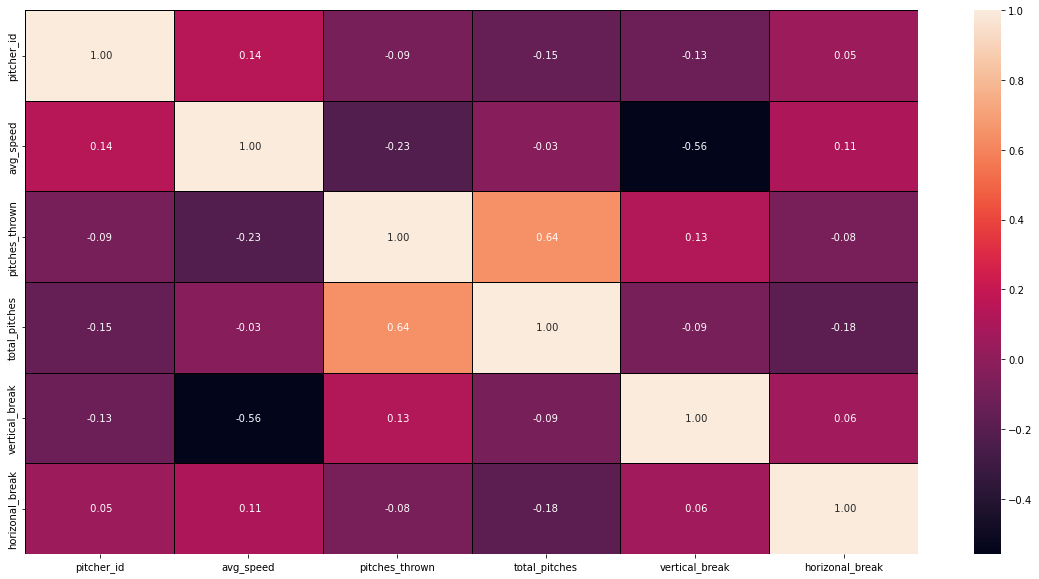

In [12]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

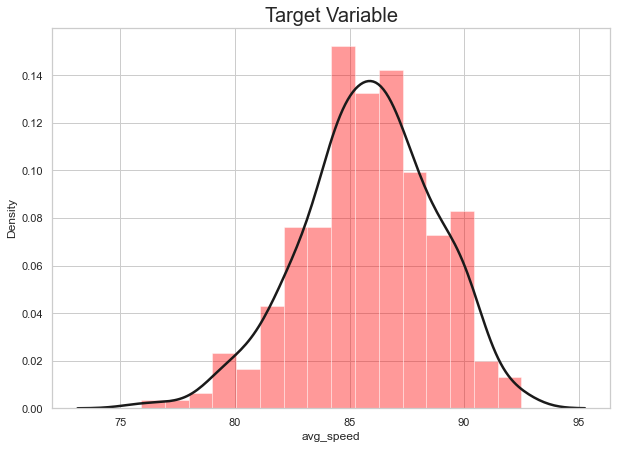

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['avg_speed'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

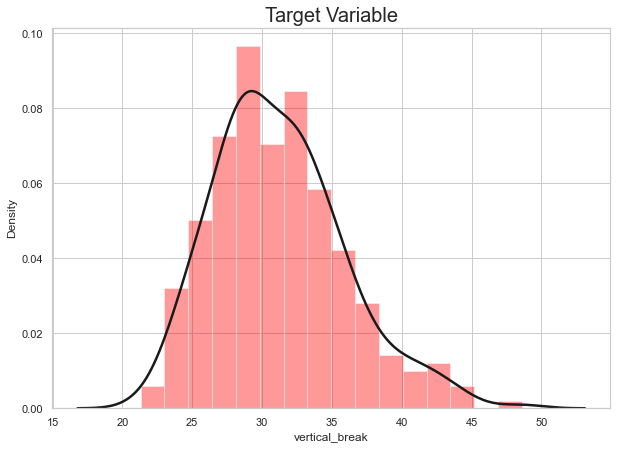

In [14]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,7))
sns.distplot(df['vertical_break'], color='red',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=20)
plt.show()

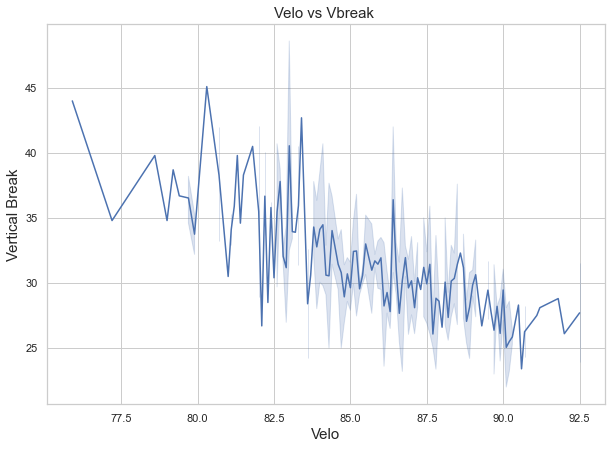

In [15]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='avg_speed', y='vertical_break')
plt.title('Velo vs Vbreak ', fontsize=15)
plt.xlabel('Velo', fontsize=15)
plt.ylabel('Vertical Break',fontsize=15)
plt.show()

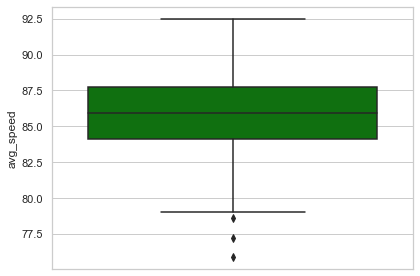

In [16]:
sns.boxplot(y=df['avg_speed'], color='green', orient='x')
plt.tight_layout()

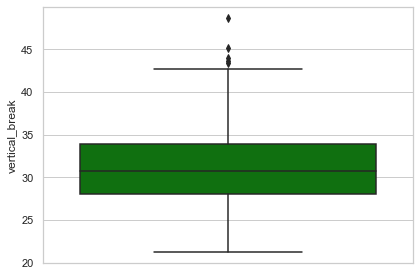

In [17]:
sns.boxplot(y=df['vertical_break'], color='green', orient='x')
plt.tight_layout()

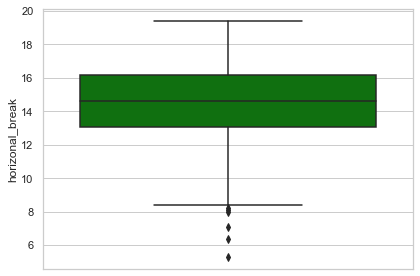

In [18]:
sns.boxplot(y=df['horizonal_break'], color='green', orient='x')
plt.tight_layout()

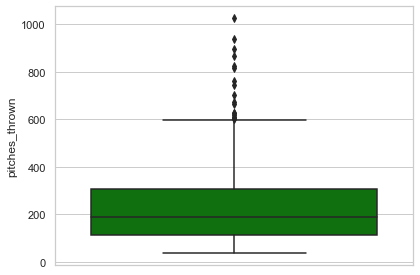

In [19]:
sns.boxplot(y=df['pitches_thrown'], color='green', orient='x')
plt.tight_layout()

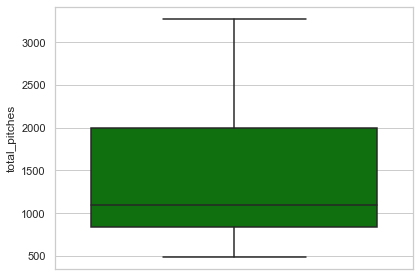

In [20]:
sns.boxplot(y=df['total_pitches'], color='green', orient='x')
plt.tight_layout()